In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from collections import Counter


In [ ]:
df = pd.read_csv("sentiment.csv")

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
df.shape

(732, 15)

In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [ ]:
df['Text'] = df['Text'].str.strip()
df['Sentiment'] = df['Sentiment'].str.strip()
df['User'] = df['User'].str.strip()
df['Platform'] = df['Platform'].str.strip()
df['Hashtags'] = df['Hashtags'].str.strip()
df['Country'] = df['Country'].str.strip()

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [ ]:
df["Retweets"] = df["Retweets"].astype(int)
df["Likes"] = df["Likes"].astype(int)

In [ ]:
df.drop(columns = ["Unnamed: 0.1","Unnamed: 0"],axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       732 non-null    object        
 1   Sentiment  732 non-null    object        
 2   Timestamp  732 non-null    datetime64[ns]
 3   User       732 non-null    object        
 4   Platform   732 non-null    object        
 5   Hashtags   732 non-null    object        
 6   Retweets   732 non-null    int64         
 7   Likes      732 non-null    int64         
 8   Country    732 non-null    object        
 9   Year       732 non-null    int32         
 10  Month      732 non-null    int32         
 11  Day        732 non-null    int32         
 12  Hour       732 non-null    int64         
dtypes: datetime64[ns](1), int32(3), int64(3), object(6)
memory usage: 65.9+ KB


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.describe()

,Timestamp,Retweets,Likes,Year,Month,Day,Hour
count,732,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,2020-12-08 21:37:38.196721408,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
min,2010-05-15 15:30:00,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,2019-03-08 17:27:30,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,2021-09-20 14:30:00,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,2023-02-26 11:48:45,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,2023-10-22 20:45:00,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000
std,NaN,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414


In [ ]:
df.columns

Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

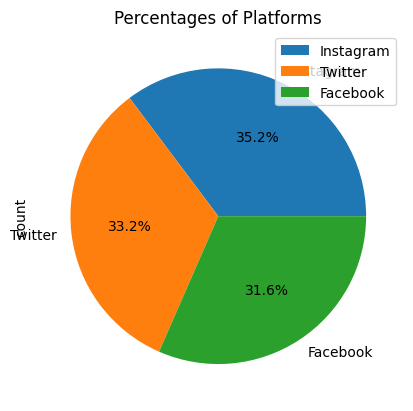

In [ ]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

/tmp/ipython-input-1863557813.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df['Sentiment'].isin(['Positive','Negative'])], x='Sentiment', y='Retweets', palette="Set1", ci=None)
/tmp/ipython-input-1863557813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['Sentiment'].isin(['Positive','Negative'])], x='Sentiment', y='Retweets', palette="Set1", ci=None)


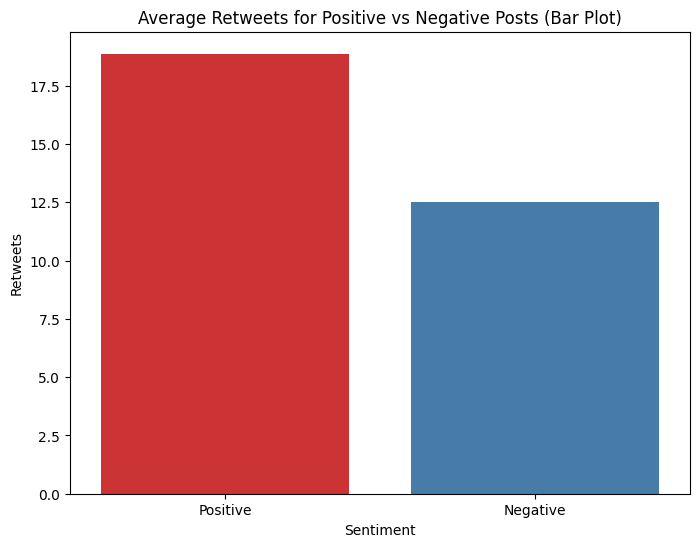

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=df[df['Sentiment'].isin(['Positive','Negative'])], x='Sentiment', y='Retweets', palette="Set1", ci=None)
plt.title('Average Retweets for Positive vs Negative Posts (Bar Plot)')
plt.show()


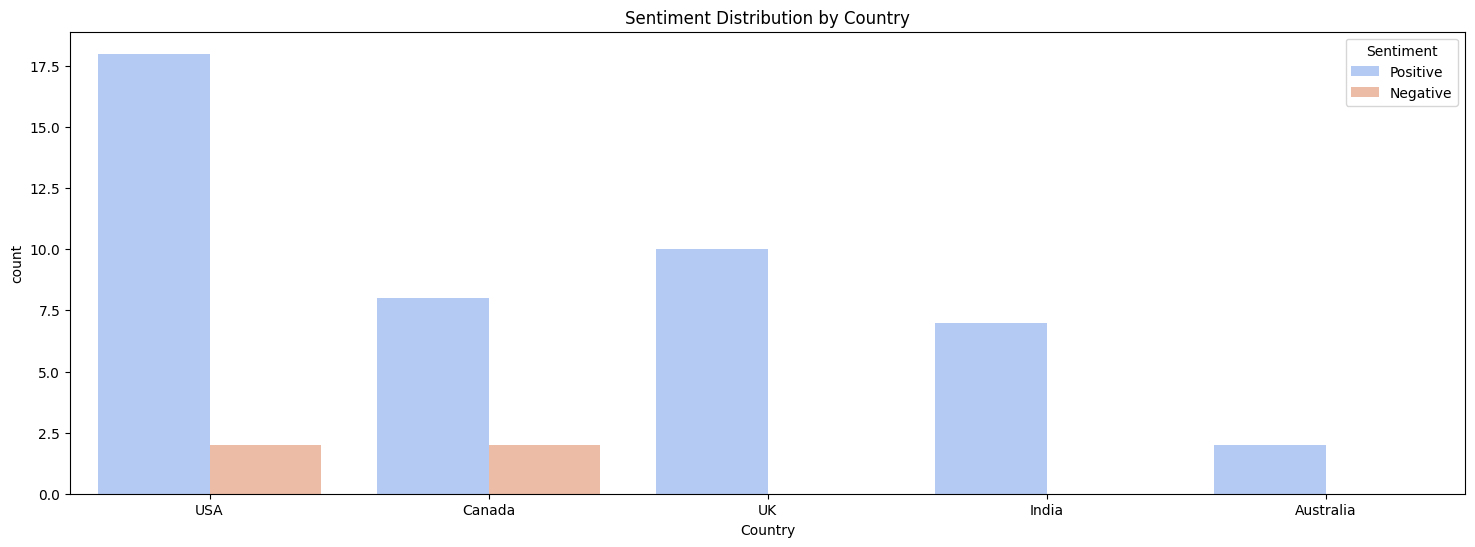

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(data=df[df['Sentiment'].isin(['Positive','Negative'])], x='Country', hue='Sentiment', palette="coolwarm")
plt.title('Sentiment Distribution by Country')
plt.show()

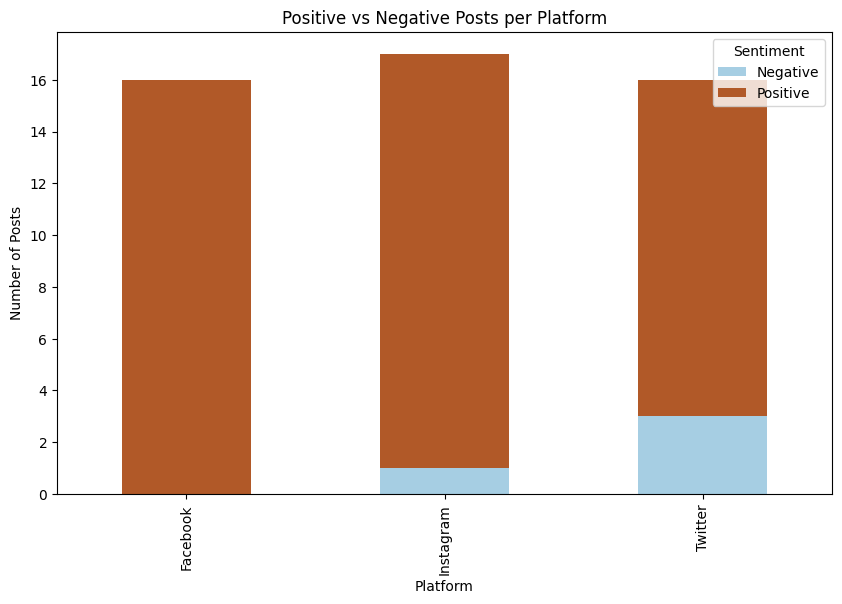

In [ ]:
platform_sentiment = df[df['Sentiment'].isin(['Positive','Negative'])].groupby(['Platform','Sentiment']).size().unstack()
platform_sentiment.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Paired')
plt.title('Positive vs Negative Posts per Platform')
plt.ylabel('Number of Posts')
plt.show()

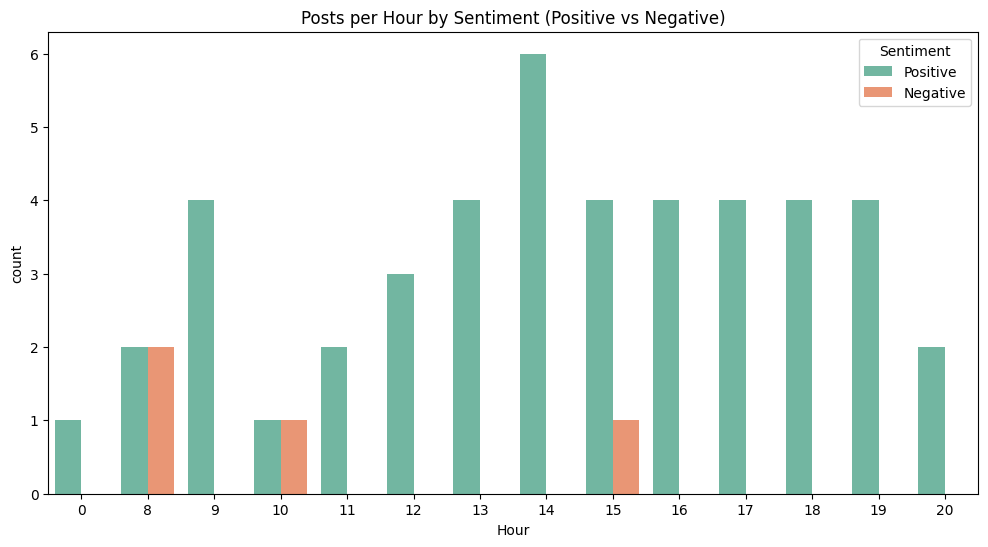

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['Sentiment'].isin(['Positive','Negative'])], x='Hour', hue='Sentiment', palette='Set2')
plt.title('Posts per Hour by Sentiment (Positive vs Negative)')
plt.show()

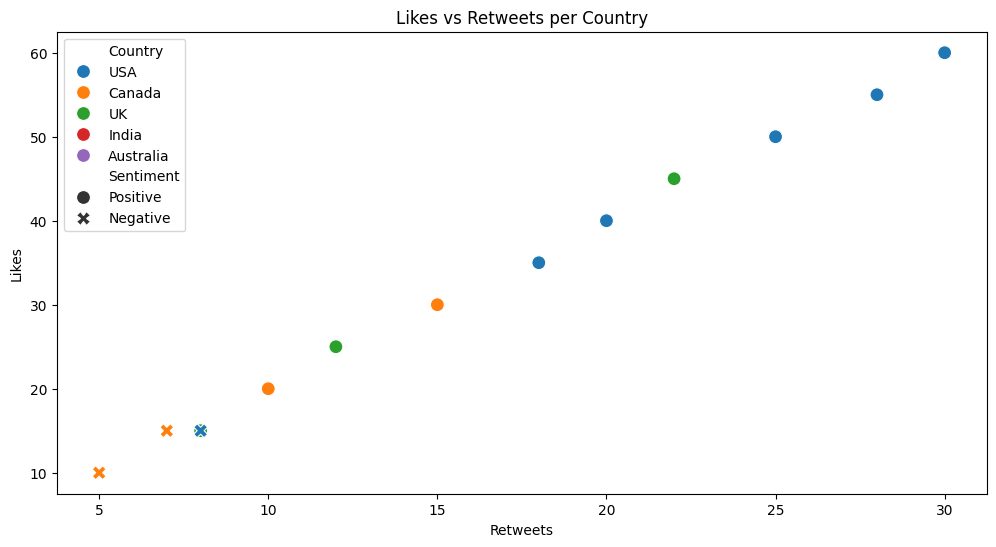

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df[df['Sentiment'].isin(['Positive','Negative'])], x='Retweets', y='Likes', hue='Country', style='Sentiment', s=100)
plt.title('Likes vs Retweets per Country')
plt.show()

/tmp/ipython-input-891236402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Platform', palette='Set3')


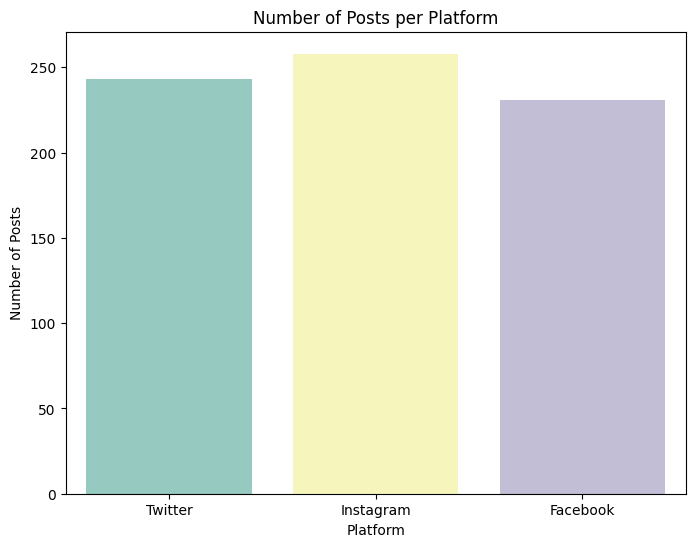

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Platform', palette='Set3')
plt.title('Number of Posts per Platform')
plt.ylabel('Number of Posts')
plt.show()

In [ ]:
def get_top_hashtags(sentiment_type, top_n=10):
    hashtags_list = df[df['Sentiment']==sentiment_type]['Hashtags'].dropna().tolist()
    hashtags_flat = [tag.strip() for tags in hashtags_list for tag in tags.split()]
    counter = Counter(hashtags_flat)
    return counter.most_common(top_n)

In [ ]:
def get_top_hashtags(sentiment_type, top_n=10):
    hashtags_list = df[df['Sentiment']==sentiment_type]['Hashtags'].dropna().tolist()
    hashtags_flat = [tag.strip() for tags in hashtags_list for tag in tags.split()]
    counter = Counter(hashtags_flat)
    return counter.most_common(top_n)

top_positive_hashtags = get_top_hashtags('Positive')
print("Top 10 Positive Hashtags:")
print(top_positive_hashtags)

Top 10 Positive Hashtags:
[('#Nature', 2), ('#Fitness', 2), ('#Reflection', 2), ('#Gaming', 2), ('#Reading', 2), ('#VirtualReality', 2), ('#Art', 2), ('#Cooking', 2), ('#Park', 1), ('#Workout', 1)]


In [ ]:

top_negative_hashtags = get_top_hashtags('Negative')
print("\nTop 10 Negative Hashtags:")
print(top_negative_hashtags)


Top 10 Negative Hashtags:
[('#Traffic', 1), ('#Morning', 1), ('#Politics', 1), ('#Debate', 1), ('#SickDay', 1), ('#Health', 1), ('#WinterBlues', 1), ('#Mood', 1)]


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(
    df["Hashtags"], df["Sentiment"], test_size=0.3, random_state=50
)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LinearSVC()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6090909090909091
